# Importing Libraries


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import io
import re

# Import Datasets

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Teams.csv to Teams.csv
Saving Players.csv to Players.csv


In [7]:
players_df = pd.read_csv(io.BytesIO(uploaded['Players.csv']))
teams_df = pd.read_csv(io.BytesIO(uploaded['Teams.csv']))

# Exploring Players Dataset

In [8]:
players_df.head()

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"


In [9]:
players_df.shape

(500, 7)

In [10]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      500 non-null    int64 
 1   Player    500 non-null    object
 2   Gold      500 non-null    int64 
 3   Silver    500 non-null    int64 
 4   Bronze    500 non-null    int64 
 5   S Tier    500 non-null    int64 
 6   Earnings  500 non-null    object
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [11]:
players_df = players_df.drop_duplicates() #removing duplicate values
players_df

,Rank,Player,Gold,Silver,Bronze,S Tier,Earnings
0,1,zombs,13,5,1,1,"$113,550"
1,2,ShahZaM,13,4,1,1,"$113,450"
2,3,dapr,14,3,1,1,"$112,870"
3,4,SicK,12,3,1,1,"$112,650"
4,5,cNed,12,4,2,1,"$107,735"
...,...,...,...,...,...,...,...
495,496,Kim,3,4,1,0,"$5,555"
496,497,Less,3,1,1,0,"$5,543"
497,498,Senhoachic,7,2,5,0,"$5,537"
498,499,chase,19,10,2,0,"$5,531"


In [12]:
players_df.isna().sum()

,0
Rank,0
Player,0
Gold,0
Silver,0
Bronze,0
S Tier,0
Earnings,0


# Exploring Teams Dataset

In [13]:
teams_df.head()

,Rank,Team,Gold,Silver,Bronze,S Tier,Earnings
0,1,Sentinels,12,3,1,1,"$561,500"
1,2,Acend,5,1,1,1,"$498,859"
2,3,Gambit Esports,8,3,0,1,"$495,638"
3,4,Team Liquid,4,2,2,0,"$295,374"
4,5,G2 Esports,7,2,1,0,"$257,925"


In [14]:
teams_df.shape

(402, 7)

In [15]:
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rank      402 non-null    int64 
 1   Team      402 non-null    object
 2   Gold      402 non-null    int64 
 3   Silver    402 non-null    int64 
 4   Bronze    402 non-null    int64 
 5   S Tier    402 non-null    int64 
 6   Earnings  402 non-null    object
dtypes: int64(5), object(2)
memory usage: 22.1+ KB


In [16]:
teams_df.isna().sum()

,0
Rank,0
Team,0
Gold,0
Silver,0
Bronze,0
S Tier,0
Earnings,0


# Descriptive Statistics:

What is the average number of gold medals won by players?

In [17]:
# Calculate the average number of gold medals
average_gold_medals = players_df["Gold"].mean()

print("Average gold medals won by players:", average_gold_medals)

Average gold medals won by players: 6.912


What is the average number of silver medals won by players?

In [112]:
# Calculate the average number of silver medals
average_silver_medals = players_df["Silver"].mean()

print("Average silver medals won by players:", average_silver_medals)

Average silver medals won by players: 4.054


What is the average number of bronze medals won by players?

In [113]:
# Calculate the average number of Bronze medals
average_bronze_medals = players_df["Bronze"].mean()

print("Average bronze medals won by players:", average_bronze_medals)

Average bronze medals won by players: 1.666


What is the distribution of earnings among top 10 players?

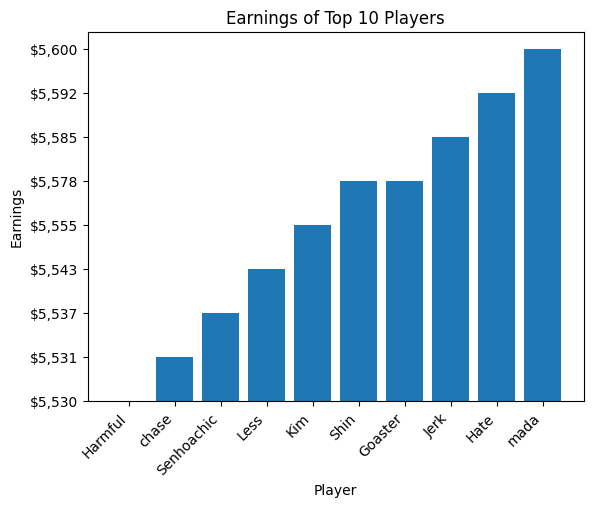

In [22]:
# Get the top 10 players based on a relevant metric (e.g., Rank)
top_10_players = players_df.nlargest(10, "Rank")

# Create a bar chart to visualize the distribution of earnings among top 10 players
plt.bar(top_10_players["Player"], top_10_players["Earnings"])
plt.title("Earnings of Top 10 Players")
plt.xlabel("Player")
plt.ylabel("Earnings")
plt.xticks(rotation=45, ha="right")
plt.show()

How many players are in the S Tier?




In [29]:
# Count the number of players in the S Tier
num_s_tier_players = players_df["S Tier"].value_counts()

print("Number of players in the S Tier:", num_s_tier_players)

Number of players in the S Tier: S Tier
0    485
1     15
Name: count, dtype: int64


How many teams are in the S Tier?

In [64]:
# Count the number of teams in the S Tier
num_s_tier_teams = teams_df["S Tier"].value_counts()

print("Number of teams in the S Tier:", num_s_tier_teams)

Number of teams in the S Tier: S Tier
0    399
1      3
Name: count, dtype: int64


How does the number of players in each S Tier category compare?

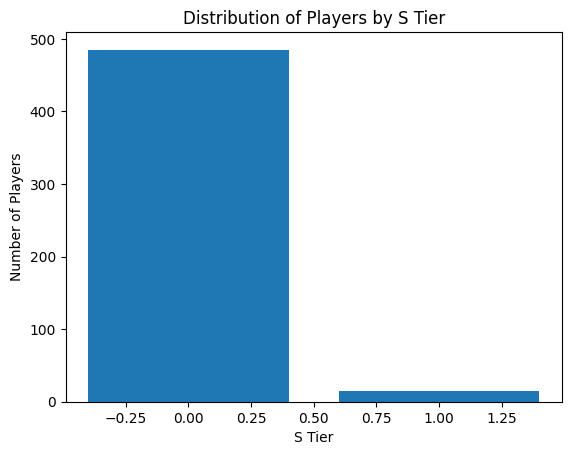

In [111]:
# Count the number of players in each S Tier category
s_tier_counts = players_df["S Tier"].value_counts()

# Create a bar chart
plt.bar(s_tier_counts.index, s_tier_counts)
plt.title("Distribution of Players by S Tier")
plt.xlabel("S Tier")
plt.ylabel("Number of Players")
plt.show()

# Comparison:

Which player has the highest number of gold medals from the top 3 players?

In [32]:
# Find the player with the most gold medals
player_with_most_gold = players_df.nlargest(3, "Gold")

print("Player with the most gold medals:")
print(player_with_most_gold)

Player with the most gold medals:
     Rank     Player  Gold  Silver  Bronze  S Tier Earnings
263   264   Critical    26       9       3       0  $10,171
90     91   rite2ace    25       9       6       0  $23,184
116   117  Amaterasu    23       7       4       0  $19,478


### Converting Players and Teams "Earning" column datatype OBJECT to INTEGER

1. Convert Players "Earning" Column Datatype to Integer

In [37]:
players_df['Earnings'] = players_df['Earnings'].astype(str).str.replace(r'[^\d]', '', regex=True)
players_df['Earnings'] = pd.to_numeric(players_df['Earnings'])

In [38]:
players_df['Earnings'] = pd.to_numeric(players_df['Earnings'], errors='coerce')

In [39]:
print(players_df['Earnings'].dtype)

int64


2. Convert Teams "Earning" Column Datatype to Integer

In [41]:
teams_df['Earnings'] = teams_df['Earnings'].astype(str).str.replace(r'[^\d]', '', regex=True)
teams_df['Earnings'] = pd.to_numeric(teams_df['Earnings'])

In [42]:
teams_df['Earnings'] = pd.to_numeric(teams_df['Earnings'], errors='coerce')

In [43]:
print(teams_df['Earnings'].dtype)

int64


How does the average earnings of players compare to the average earnings of teams?

In [44]:
# Calculate average earnings for players and teams
average_player_earnings = players_df["Earnings"].mean()
average_team_earnings = teams_df["Earnings"].mean()

# Compare the averages
if average_player_earnings > average_team_earnings:
    print("Players have higher average earnings than teams.")
elif average_player_earnings < average_team_earnings:
    print("Teams have higher average earnings than players.")
else:
    print("Players and teams have the same average earnings.")

Teams have higher average earnings than players.


Is there a correlation between a player's rank and their earnings?





In [45]:
# Calculate the correlation coefficient between rank and earnings
correlation = players_df["Rank"].corr(players_df["Earnings"])

print("Correlation between rank and earnings:", correlation)

Correlation between rank and earnings: -0.7058192624454462


a correlation coefficient of -0.7058192624454462 indicates a strong negative correlation.

# Relationship:

Is there a relationship between the number of gold medals a player wins and their S Tier status?

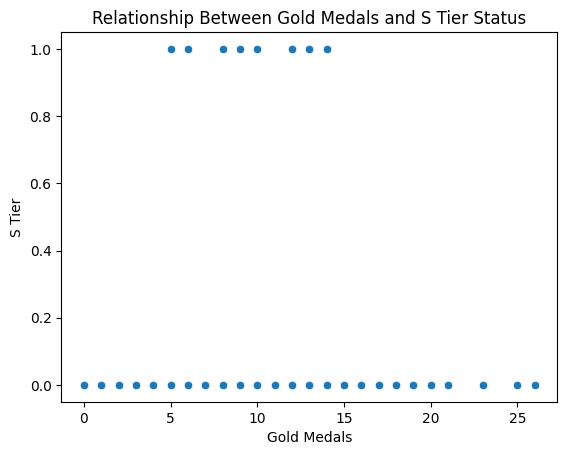

In [46]:
# Create a scatter plot to visualize the relationship
sns.scatterplot(x="Gold", y="S Tier", data=players_df)
plt.title("Relationship Between Gold Medals and S Tier Status")
plt.xlabel("Gold Medals")
plt.ylabel("S Tier")
plt.show()

The above scatterplot graph show the non-linear relationship between the Gold Medals and S Tier Status

Does a team's rank correlate with its total earnings?

In [48]:
# Calculate the correlation coefficient between rank and earnings
correlation = players_df["Rank"].corr(players_df["Earnings"])

print("Correlation between rank and earnings:", correlation)

Correlation between rank and earnings: -0.7058192624454462


How do the earnings of players on different teams compare?

In [63]:
# Merge the datasets on the "Earnings" column
merged_df = pd.merge(players_df, teams_df, on="Earnings")

# Group the merged data by "Team" and calculate average player earnings
team_earnings = merged_df.groupby("Team")["Earnings"].mean()

# Sort the teams by average earnings
top_teams = team_earnings.sort_values(ascending=False)

print(top_teams)

Team
Dignitas Female     35800.0
Purple Cobras        8672.0
Zero Zone            8057.0
KPI Gaming           6780.0
Overtime Esports     6535.0
NOTHING2LOSE         5650.0
Name: Earnings, dtype: float64


# Prediction:

Actual Earning:

In [95]:
players_df['Earnings']

,Earnings
0,113550
1,113450
2,112870
3,112650
4,107735
...,...
495,5555
496,5543
497,5537
498,5531


Predicted Earning:

In [106]:
# Select features and target variable
X = players_df[["Rank", "Gold"]]  # Independent variables
y = players_df["Earnings"]  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


# Make predictions on the entire dataset
players_df['Predicted Earnings'] = model.predict(players_df[['Rank', 'Gold']])

print(players_df)

     Rank      Player  Gold  Silver  Bronze  S Tier  Earnings  \
0       1       zombs    13       5       1       1    113550   
1       2     ShahZaM    13       4       1       1    113450   
2       3        dapr    14       3       1       1    112870   
3       4        SicK    12       3       1       1    112650   
4       5        cNed    12       4       2       1    107735   
..    ...         ...   ...     ...     ...     ...       ...   
495   496         Kim     3       4       1       0      5555   
496   497        Less     3       1       1       0      5543   
497   498  Senhoachic     7       2       5       0      5537   
498   499       chase    19      10       2       0      5531   
499   500     Harmful     6       4       2       0      5530   

     Actual Earnings  Predicted Earnings  
0             113550           112301.97  
1             113450           112301.97  
2             112870           112301.97  
3             112650           111331.41  
4   

Visualize the predicted earnings against the actual earnings for a regression model

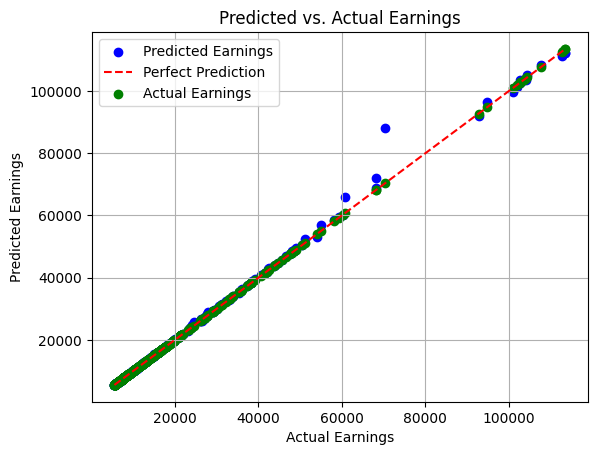

In [107]:
# Create a scatter plot
plt.scatter(players_df['Earnings'], players_df['Predicted Earnings'], c='blue', label='Predicted Earnings')

# Add a diagonal line representing perfect prediction
plt.plot([players_df['Earnings'].min(), players_df['Earnings'].max()],
         [players_df['Earnings'].min(), players_df['Earnings'].max()],
         linestyle='--', color='red', label='Perfect Prediction')

# Add actual earnings points with a different color
plt.scatter(players_df['Earnings'], players_df['Earnings'], c='green', label='Actual Earnings')

plt.title("Predicted vs. Actual Earnings")
plt.xlabel("Actual Earnings")
plt.ylabel("Predicted Earnings")
plt.legend()
plt.grid(True)
plt.show()


Can we predict a player's earnings based on their rank and number of gold medals?

In [54]:
# Select the relevant features
X = players_df[["Rank", "Gold"]]
y = players_df["Earnings"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 246414462.5440544


In [56]:
# Select the relevant features
X = players_df[["Rank", "Gold"]]
y = players_df["Earnings"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3498606.106562002


An MSE of 3498606.106562002 is significantly lower than the previous value, which suggests that the Random Forest model is performing better than the linear regression model in predicting player earnings based on rank and gold medals.

Can we predict a team's rank based on its total earnings and number of S Tier players?

In [57]:
# Select the relevant features
X = players_df[["Earnings", "S Tier"]]
y = players_df["Rank"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model

model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7452.730889487231


In [58]:
# Select the relevant features
X = players_df[["Earnings", "S Tier"]]
y = players_df["Rank"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.7135820000000057


An MSE of 1.7135820000000057 for predicting team rank based on earnings and S Tier players is very low. This indicates that the Random Forest model is performing exceptionally well in predicting team rank.

# Grouping and Aggregation:

What is the average number of gold medals won by players in each S Tier category?

In [59]:
# Group the data by "S Tier" and calculate the average gold medals
average_gold_by_s_tier = players_df.groupby("S Tier")["Gold"].mean()

print(average_gold_by_s_tier)

S Tier
0     6.783505
1    11.066667
Name: Gold, dtype: float64


What are the top 5 teams in terms of total earnings?

In [60]:
# Calculate total earnings for each team
teams_df["Total Earnings"] = teams_df["Gold"] * 4 + teams_df["Silver"] * 2 + teams_df["Bronze"]

# Get the top 5 teams by total earnings
top_5_teams = teams_df.nlargest(5, "Total Earnings")

print(top_5_teams)

     Rank               Team  Gold  Silver  Bronze  S Tier  Earnings  \
18     19    Velocity Gaming    19       8       4       0    106479   
28     29     Global Esports    18       7       2       0     76498   
165   166        iPon Esport    15      11       2       0     12358   
68     69                BIG    19       3       1       0     34360   
110   111  Mamba Mode Gaming    15       6       2       0     20755   

     Total Earnings  
18               96  
28               88  
165              84  
68               83  
110              74  


Bar Chart


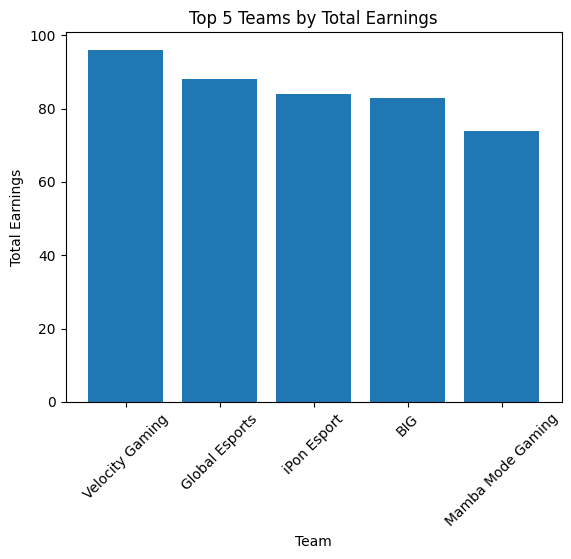

In [84]:
# Calculate total earnings for each team
teams_df["Total Earnings"] = teams_df["Gold"] * 4 + teams_df["Silver"] * 2 + teams_df["Bronze"]

# Get the top 5 teams by total earnings
top_5_teams = teams_df.nlargest(5, "Total Earnings")

# Create a bar chart
plt.bar(top_5_teams["Team"], top_5_teams["Total Earnings"])
plt.title("Top 5 Teams by Total Earnings")
plt.xlabel("Team")
plt.ylabel("Total Earnings")
plt.xticks(rotation=45)
plt.show()

What is the percentage of players in each S Tier category?

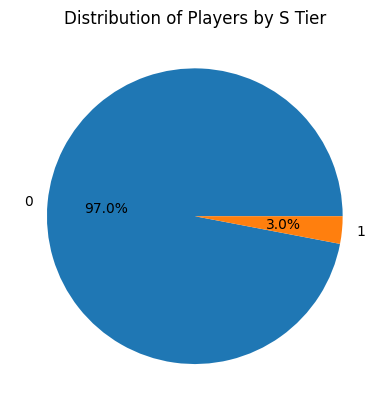

In [65]:
# Count the number of players in each S Tier category
s_tier_counts = players_df["S Tier"].value_counts()

# Create a pie chart
plt.pie(s_tier_counts, labels=s_tier_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Players by S Tier")
plt.show()

What is the percentage of teams in each S Tier category?

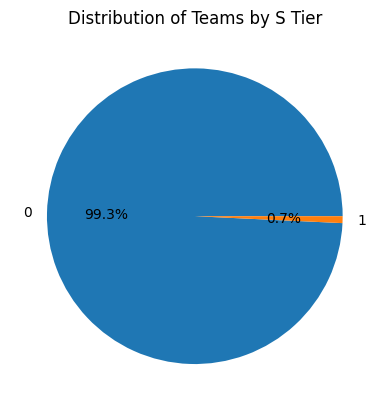

In [66]:
# Count the number of teams in each S Tier category
s_tier_counts = teams_df["S Tier"].value_counts()

# Create a pie chart
plt.pie(s_tier_counts, labels=s_tier_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Teams by S Tier")
plt.show()